In [1]:
#connect the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import zipfile
import os

In [3]:
dataset_zip = '/content/drive/MyDrive/2/Dataset-FOR-TRAINING(SKBIT).zip'
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset-1')

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
#augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [10]:
train_data = train_datagen.flow_from_directory(
    '/content/dataset-1/Dataset',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training')

Found 1920 images belonging to 6 classes.


In [11]:
val_data = train_datagen.flow_from_directory(
    '/content/dataset-1/Dataset',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 479 images belonging to 6 classes.


In [23]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    '/content/dataset-1/Dataset',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 2399 images belonging to 6 classes.


In [13]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [16]:
cnn_history = cnn_model.fit(
    train_data,
    validation_data=val_data,
    epochs=100,

)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 182ms/step - accuracy: 0.7629 - loss: 0.5081 - val_accuracy: 0.6868 - val_loss: 0.9615
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 186ms/step - accuracy: 0.7885 - loss: 0.5382 - val_accuracy: 0.6117 - val_loss: 1.3982
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 211ms/step - accuracy: 0.7966 - loss: 0.4579 - val_accuracy: 0.6889 - val_loss: 1.0676
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - accuracy: 0.7836 - loss: 0.5009 - val_accuracy: 0.6660 - val_loss: 0.7697
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 182ms/step - accuracy: 0.8008 - loss: 0.4500 - val_accuracy: 0.6555 - val_loss: 1.1289
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 181ms/step - accuracy: 0.7934 - loss: 0.5809 - val_accuracy: 0.2338 - val_loss: 3.4145
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 182ms/step - accuracy: 0.7561 - loss: 0.5860 - val_accuracy: 0.4760 - val_loss: 1.1390
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 180ms/step - accuracy: 0.7961 - loss: 0.4599 - 

In [17]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D

# MobileNetV2
mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))


mobilenet_base.trainable = False


mobilenet_model = Sequential([
    mobilenet_base,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 6 output classes
])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [18]:
mobilenet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

In [22]:
mobilenet_history = mobilenet_model.fit(
    train_data,
    validation_data=val_data,
    epochs=100,

)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 195ms/step - accuracy: 0.8490 - loss: 0.4043 - val_accuracy: 0.6451 - val_loss: 0.7954
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 164ms/step - accuracy: 0.8666 - loss: 0.3909 - val_accuracy: 0.6639 - val_loss: 0.7911
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 161ms/step - accuracy: 0.8441 - loss: 0.4353 - val_accuracy: 0.6618 - val_loss: 0.8318
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 179ms/step - accuracy: 0.8503 - loss: 0.3998 - val_accuracy: 0.6806 - val_loss: 0.7715
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 164ms/step - accuracy: 0.8450 - loss: 0.3958 - val_accuracy: 0.6618 - val_loss: 0.7705
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 177ms/step - accuracy: 0.8613 - loss: 0.3707 - val_accuracy: 0.6597 - val_loss: 0.8359
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 181ms/step - accuracy: 0.8519 - loss: 0.4084 - val_accuracy: 0.6409 - val_loss: 0.8019
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - accuracy: 0.8630 - loss: 0.3871 - 

75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7747 - loss: 1.5377
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8820 - loss: 0.3527
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step


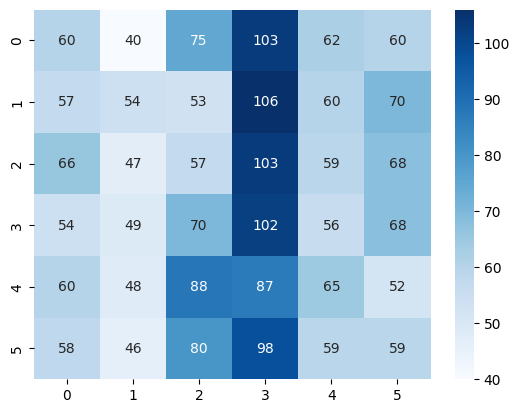

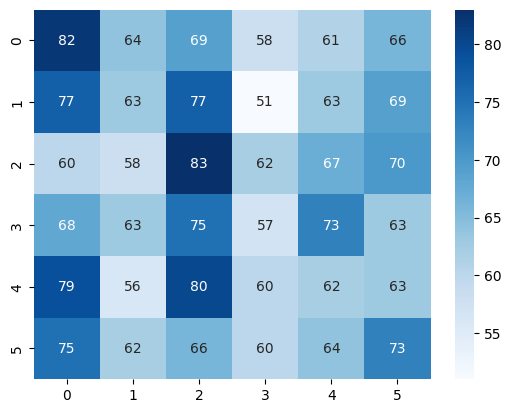

CNN Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.15      0.16       400
           1       0.19      0.14      0.16       400
           2       0.13      0.14      0.14       400
           3       0.17      0.26      0.20       399
           4       0.18      0.16      0.17       400
           5       0.16      0.15      0.15       400

    accuracy                           0.17      2399
   macro avg       0.17      0.17      0.16      2399
weighted avg       0.17      0.17      0.16      2399

MobileNet Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.20      0.20       400
           1       0.17      0.16      0.16       400
           2       0.18      0.21      0.20       400
           3       0.16      0.14      0.15       399
           4       0.16      0.15      0.16       400
           5       0.18      0.18      0.18       400

    accuracy   

In [24]:
# Evaluate the CNN model on test set
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(test_data)

# Evaluate the MobileNet model on test set
mobilenet_test_loss, mobilenet_test_acc = mobilenet_model.evaluate(test_data)


import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# CNN
cnn_preds = np.argmax(cnn_model.predict(test_data), axis=-1)
cnn_true = test_data.classes

# MobileNet
mobilenet_preds = np.argmax(mobilenet_model.predict(test_data), axis=-1)
mobilenet_true = test_data.classes


conf_matrix_cnn = confusion_matrix(cnn_true, cnn_preds)
sns.heatmap(conf_matrix_cnn, annot=True, fmt='d', cmap='Blues')
plt.show()


conf_matrix_mobilenet = confusion_matrix(mobilenet_true, mobilenet_preds)
sns.heatmap(conf_matrix_mobilenet, annot=True, fmt='d', cmap='Blues')
plt.show()

print("CNN Classification Report:\n", classification_report(cnn_true, cnn_preds))

print("MobileNet Classification Report:\n", classification_report(mobilenet_true, mobilenet_preds))


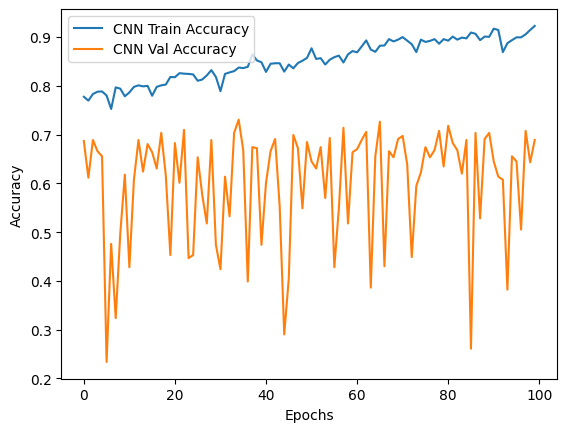

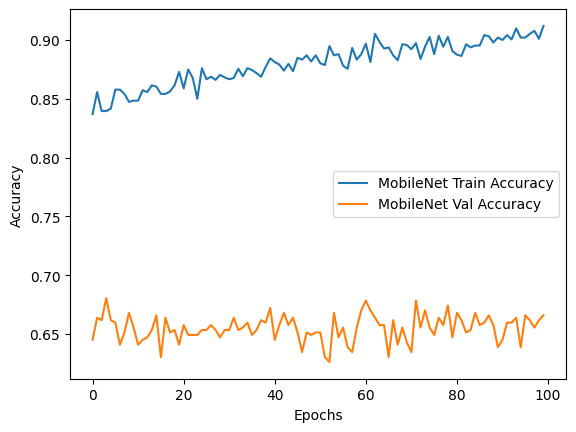

In [25]:
# Plot CNN training history
plt.plot(cnn_history.history['accuracy'], label='CNN Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot MobileNet training history
plt.plot(mobilenet_history.history['accuracy'], label='MobileNet Train Accuracy')
plt.plot(mobilenet_history.history['val_accuracy'], label='MobileNet Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
